In [16]:
import trainer
import numpy as np 
import matplotlib.pyplot as plt
import os


In [15]:
def from_the_beginning():
    # List of files to remove
    files_to_remove = [
        'exported_data.json',
        'labels.txt',
        'split_dataset.npy',
        'mfcc_features.npy',
        'model.tflite'
    ]

    # Remove the specified files if they exist
    for file in files_to_remove:
        try:
            if os.path.exists(file):
                os.remove(file)
                print(f"Removed: {file}")
            else:
                print(f"File not found: {file}")
        except Exception as e:
            print(f"Error removing {file}: {e}")
from_the_beginning()

In [2]:
splited_dataset = trainer.prepare_data()     
mfcc_features = trainer.get_mfcc(splited_dataset)

Data exported successfully.


  1%|          | 1/182 [00:01<05:57,  1.98s/it]c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\soundClassifier\trainer.py:86: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_waveform, sample_rate = librosa.load(path, sr=32000)
c:\Users\Hoon\Nextcloud3\Projects\AudioTrain\.venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 52%|█████▏    | 95/182 [00:09<00:09,  8.91it/s]

3f84618c-spacelab3.m4a
<class 'IndexError'> trainer.py 84
list index out of range


100%|██████████| 17/17 [00:06<00:00,  2.62it/s]


In [3]:
def get_fft(features):
    """Compute the FFT of the given features."""
    features = (features - np.mean(features)) / np.std(features)  # Normalize the features
    return np.fft.fft(features)

fft_features = {label: get_fft(features) for label, features in splited_dataset.items()}


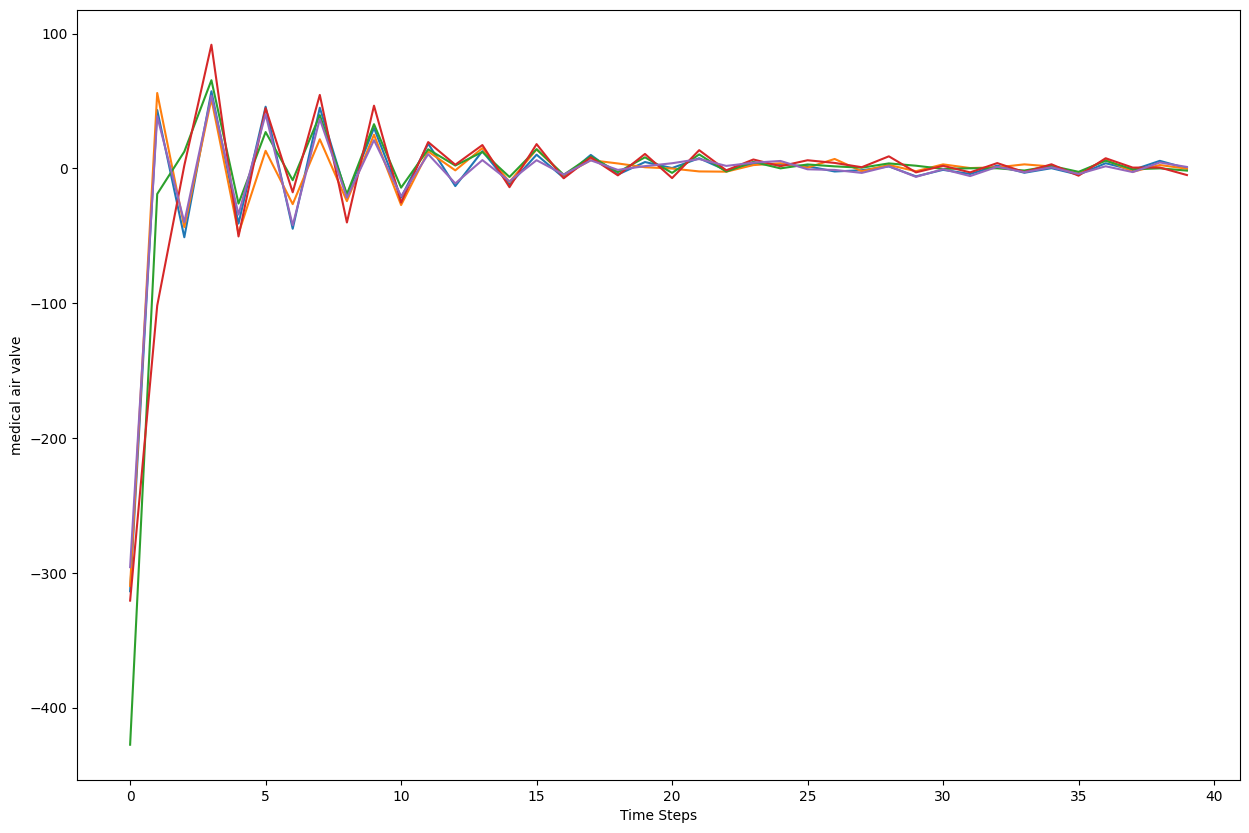

In [4]:
import random

# Plot random samples of values for each key in mfcc_features
fig  = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
for i, (label, features) in enumerate(mfcc_features.items()):
    if label not in ['Sink/Water', 'medical air valve']:continue
    # ax = fig.add_subplot(len(mfcc_features), 1, i + 1)
    random_samples = random.sample(list(features), min(5, len(features)))  # Get up to 5 random samples
    for sample in random_samples:
        ax.plot(sample, label=label)

    # plt.title(f'Random Samples for {label}')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel(f'{label}')
    # plt.legend()

# plt.tight_layout()
plt.show()

In [5]:

mfcc_features = {label: (features * 3 if label not in ['Rolling Carts', 'Speech'] else features) for label, features in mfcc_features.items()}

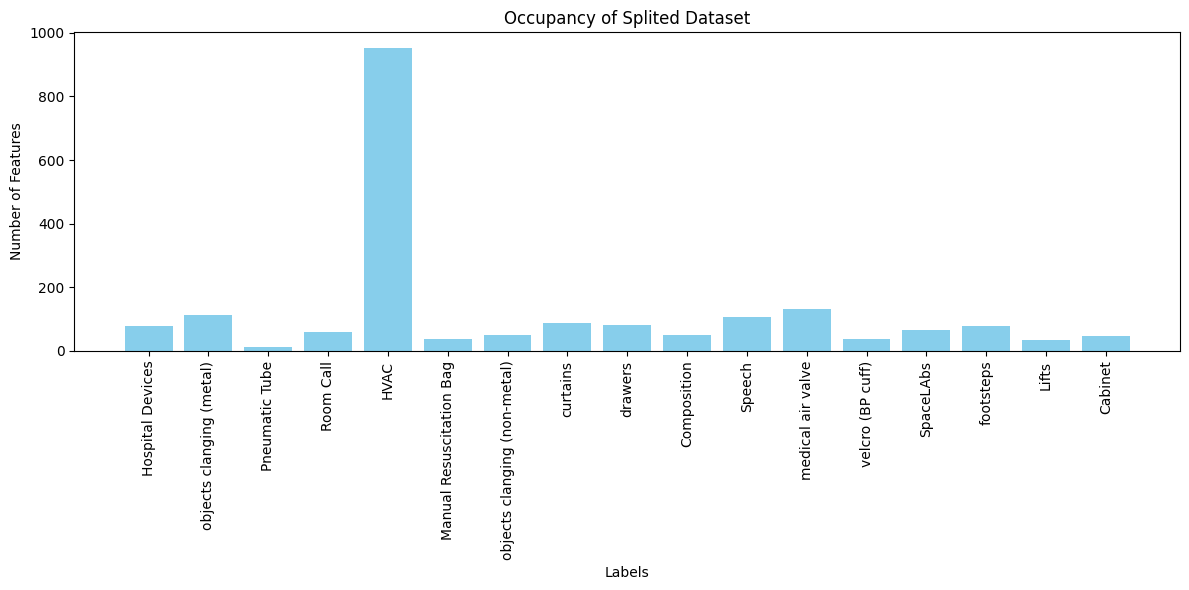

In [6]:
# Visualize the occupancy of the splited dataset
occupancy = {label: len(features) for label, features in mfcc_features.items()}
labels = list(occupancy.keys())
values = list(occupancy.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Features')
plt.title('Occupancy of Splited Dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [7]:

x_train, x_test, y_train, y_test, label = trainer.split_data(mfcc_features)
with open('labels.txt', 'w') as f:
    for lbl in label:
        f.write(f"{lbl}\n")



Training set size: 1416
Testing set size: 607


In [8]:
model = trainer.build_model(x_train, x_test, y_train, y_test)

c:\Users\Hoon\Nextcloud3\Projects\AudioTrain\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 17)             │         8,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 382,545 (1.46 MB)

 Trainable params: 382,545 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4596 - loss: 3.4099 - val_accuracy: 0.7232 - val_loss: 0.9203
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7480 - loss: 0.9220 - val_accuracy: 0.8715 - val_loss: 0.4792
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8751 - loss: 0.4805 - val_accuracy: 0.9325 - val_loss: 0.2766
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8708 - loss: 0.4462 - val_accuracy: 0.9308 - val_loss: 0.2287
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9257 - loss: 0.2503 - val_accuracy: 0.9539 - val_loss: 0.1554
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9424 - loss: 0.1959 - val_accuracy: 0.9588 - val_loss: 0.1486
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9388 - loss: 0.1899 - val_accuracy: 0.9835 - val_loss: 0.0886
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.0962 - val_accu

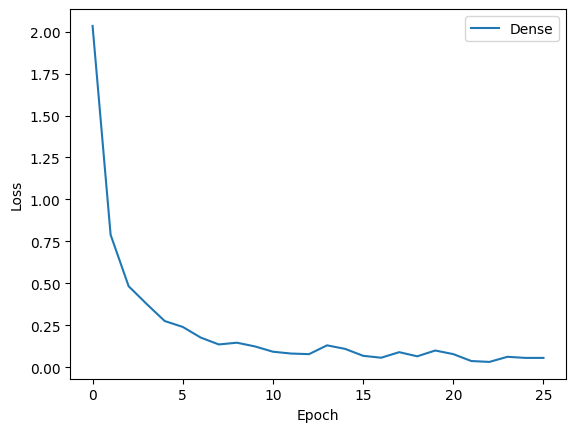

In [9]:

trainer.train(model, x_train, x_test, y_train, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0052     
Test Loss: 0.0075
Test Accuracy: 0.9984
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                              precision    recall  f1-score   support

            Hospital Devices       1.00      0.96      0.98        23
    objects clanging (metal)       1.00      1.00      1.00        25
              Pneumatic Tube       1.00      1.00      1.00         6
                   Room Call       1.00      1.00      1.00        20
                        HVAC       1.00      1.00      1.00       285
    Manual Resuscitation Bag       1.00      1.00      1.00        12
objects clanging (non-metal)       1.00      1.00      1.00        18
                    curtains       1.00      1.00      1.00        24
                     drawers       1.00      1.00      1.00        25
                 Composition       1.00      1.00      1.00        16
                      Speech       1.00      1.00      1.00        37
  

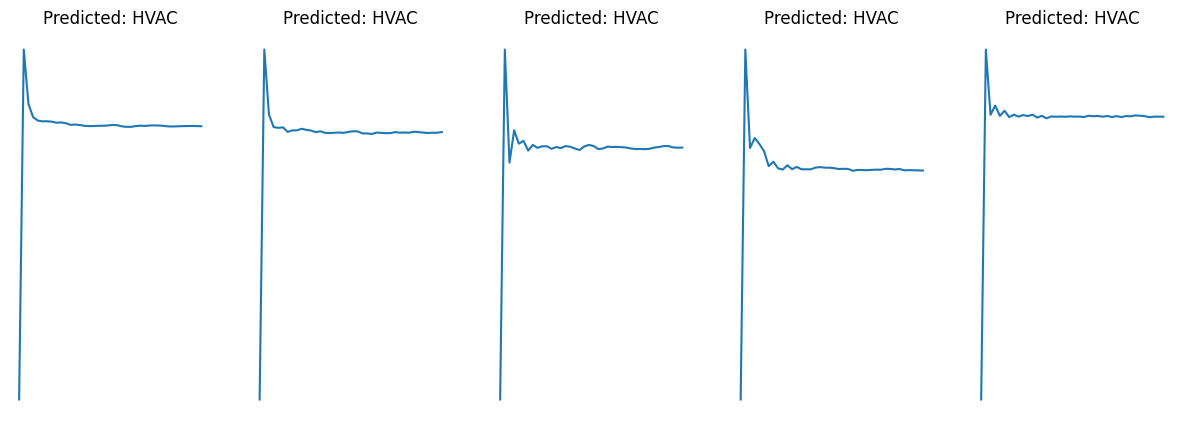

In [10]:
trainer.evaluate(model, x_test, y_test, label)

In [11]:
import tensorflow as tf
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmp308f8yni\assets


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmp308f8yni\assets


Saved artifact at 'C:\Users\Hoon\AppData\Local\Temp\tmp308f8yni'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  1499980103376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1499980255952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1499980267216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635350752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635359200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635357264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635429328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635430208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635439536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1495635594576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14956355988

In [12]:
def predict_labels(x_test, model_path='model.tflite'):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Prepare the input data
    x_test_input = np.array([x_test.reshape(1, len(x_test), 1)], dtype=np.float32)
    
    # Set the tensor for the input
    interpreter.set_tensor(input_details[0]['index'], x_test_input[0])

    # Run the model
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Process the output data
    predicted_classes_tflite = np.argmax(output_data, axis=1)[0]
    # Get the labels from the dataset
    
    return predicted_classes_tflite

In [13]:
t = len(x_test)
for x, y in zip(x_test, y_test):
    resx = label[predict_labels(x)]
    resy = label[np.argmax(y)]
    if resx != resy:
        print(resx, '\t\t != \t' , resy)
        t -=1

print(t/len(x_test))

SpaceLAbs 		 != 	 Hospital Devices
0.9983525535420099


In [14]:
a = np.array([1,2,3,4,5])
[(i, value) for i, value in enumerate(a) if value > 2]

[(2, 3), (3, 4), (4, 5)]